In [11]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

In [12]:
# Load the saved model
with open('../modells/best_email_phishing_model.pkl', 'rb') as f:
    model = joblib.load(f)

# Load the new dataset
new_data = pd.read_csv('../datasets/emails_model_testing_ling_ds.csv')

In [13]:
X_new = new_data['body']
X_new.head()

0    content - length : 3386 apple-iss research cen...
1    lang classification grimes , joseph e . and ba...
2    i am posting this inquiry for sergei atamas ( ...
3    a colleague and i are researching the differin...
4    earlier this morning i was on the phone with a...
Name: body, dtype: object

In [14]:
# using the model to predict this new data
predictions = model.predict(X_new)

new_data['predicted_class'] = predictions

In [15]:
new_data.head()

,subject,body,label,predicted_class
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,Safe Email
1,NaN,"lang classification grimes , joseph e . and ba...",0,Safe Email
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,Safe Email
3,risk,a colleague and i are researching the differin...,0,Safe Email
4,request book information,earlier this morning i was on the phone with a...,0,Safe Email


In [19]:
# If they are not categorical, you can convert them to categorical for plotting purposes
new_data['label'] = new_data['label'].astype('category')
new_data['predicted_class'] = new_data['predicted_class'].astype('category')

new_data["predicted_class"].unique()

['Safe Email', 'Phishing Email']
Categories (2, object): ['Phishing Email', 'Safe Email']

In [20]:
new_data['predicted_class_encoded'] = new_data['predicted_class'].replace({'Phishing Email': 1, 'Safe Email': 0})

# Verify the encoding
print(new_data[['predicted_class', 'predicted_class_encoded']].head())

  predicted_class predicted_class_encoded
0      Safe Email                       0
1      Safe Email                       0
2      Safe Email                       0
3      Safe Email                       0
4      Safe Email                       0


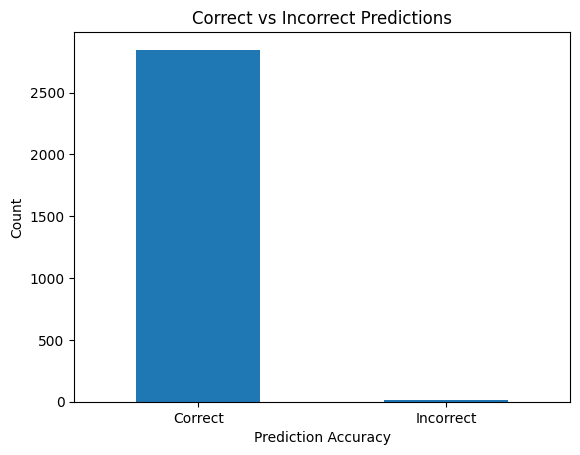

In [22]:
new_data["correct_prediction"] = new_data['label'] == new_data['predicted_class_encoded']

comparison = new_data["correct_prediction"].value_counts()

# Plot the comparison
comparison.plot(kind='bar', stacked=True)
plt.xticks([0, 1], ['Correct', 'Incorrect'], rotation=0)
plt.xlabel('Prediction Accuracy')
plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions')
plt.show()

In [23]:
# Saving the results
new_data.to_csv('new_email_dataset_with_predictions.csv', index=False)